In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import librosa
import librosa.display

from IPython.display import Audio

import os
import pickle
from tqdm import tqdm_notebook

### Reps with 32k Waveforms

In [2]:
path_dataset = '/home/edoardobucheli/Datasets/FSDKaggle2018'

#path_train = os.path.join(path_dataset,'audio_train_32k/')
path_test = os.path.join(path_dataset,'audio_test_32k/')

In [3]:
train_data = pd.read_csv(os.path.join(path_dataset,'train_post_competition.csv'))
test_data = pd.read_csv(os.path.join(path_dataset,'test_post_competition_scoring_clips.csv'))

In [4]:
len(test_data)

1600

In [5]:
classes = np.unique(train_data['label'])
n_classes = len(classes)

num_to_label = dict([[v,k] for v,k in enumerate(classes)])
label_to_num = dict([[k,v] for v,k in enumerate(classes)])

In [6]:
#filenames_all = train_data['fname'].tolist()
#labels_all = [label_to_num[f] for f in train_data['label']]

filenames_test = test_data['fname'].tolist()
labels_test = [label_to_num[f] for f in test_data['label']]

### MakeTransformation

In [7]:
def load_and_preprocess(filenames,path,sr,file_length,n_fft,hop_length,mels,rep):
        
    specs = []
    
    for i,file in enumerate(tqdm_notebook(filenames)):
        
        wave,_ = librosa.load(os.path.join(path,file),sr=sr,dtype = np.float32) 
        wave,_ = librosa.effects.trim(wave)
        
        if len(wave)<=file_length:    
            amount = file_length-len(wave)
            wave = np.pad(wave,(int(np.ceil(amount/2)),int(np.floor(amount/2))),'constant')
                    
        
        if rep == 'mel':
            spect = librosa.feature.melspectrogram(wave,sr=sr,hop_length=hop_length,n_mels=mels)
        elif rep == 'ps':
            spect = librosa.stft(wave,n_fft=n_fft,hop_length=hop_length)
            spect = np.abs(spect)
        elif rep == 'mfcc':
            spect = librosa.feature.mfcc(wave,sr=sr,n_mels = mels,n_mfcc = mels,hop_length=hop_length)
    
        spect = librosa.amplitude_to_db(spect)
        spect = spect - np.min(spect)
        spect /= np.max(spect)
        spect = spect * 2 -1
        
        specs.append(spect)
    return specs

### Ps257 HL128

In [8]:
outfile = './preprocessed_test/PS-257-HL128-WF32k-64k'

sr = 32000
file_length = 64000

n_fft = 512
hop_length = 128

mels = 0
rep = 'ps'

frames = int(np.ceil(file_length/hop_length))

In [9]:
X_all = load_and_preprocess(filenames_test,path_test,
                            sr,file_length,
                            n_fft,hop_length,mels,rep)

### Check and Replace Weird Things

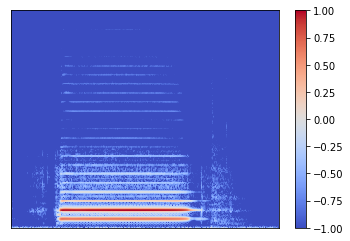

In [10]:
librosa.display.specshow(X_all[0])
plt.colorbar()

In [11]:
for i,spect in enumerate(X_all):
    
    this_min = np.min(spect)
    this_max = np.max(spect)
    if this_min < -1 or this_max > 1 or np.isnan(this_min):
        print('Wierdness at {}'.format(i))

### Pickle It

In [12]:
with open(outfile,'wb') as fp:
    pickle.dump(X_all,fp)

### PS 257 HL 256

In [8]:
outfile = './preprocessed_test/PS-257-HL256-WF32k-64k'

sr = 32000
file_length = 64000

n_fft = 512
hop_length = 256

mels = 0
rep = 'ps'

frames = int(np.ceil(file_length/hop_length))

In [9]:
X_all = load_and_preprocess(filenames_test,path_test,
                            sr,file_length,
                            n_fft,hop_length,mels,rep)

### Check and Replace Weird Things

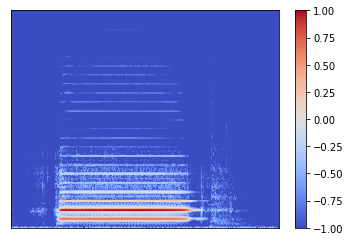

In [10]:
librosa.display.specshow(X_all[0])
plt.colorbar()

In [11]:
for i,spect in enumerate(X_all):
    
    this_min = np.min(spect)
    this_max = np.max(spect)
    if this_min < -1 or this_max > 1 or np.isnan(this_min):
        print('Wierdness at {}'.format(i))

### Pickle It

In [12]:
with open(outfile,'wb') as fp:
    pickle.dump(X_all,fp)

### PS-257 HL512

In [8]:
outfile = './preprocessed_test/PS-257-HL512-WF32k-64k'

sr = 32000
file_length = 64000

n_fft = 512
hop_length = 512

mels = 0
rep = 'ps'

frames = int(np.ceil(file_length/hop_length))

In [9]:
X_all = load_and_preprocess(filenames_test,path_test,
                            sr,file_length,
                            n_fft,hop_length,mels,rep)

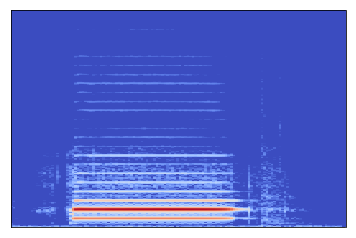

In [10]:
librosa.display.specshow(X_all[0])

In [11]:
for i,spect in enumerate(X_all):
    
    this_min = np.min(spect)
    this_max = np.max(spect)
    if this_min < -1 or this_max > 1 or np.isnan(this_min):
        print('Wierdness at {}'.format(i))

### Pickle It

In [12]:
with open(outfile,'wb') as fp:
    pickle.dump(X_all,fp)

### MFCC-80 HL256

In [23]:
outfile = './preprocessed_test/MFCC-80-HL256-WF32k-64k'

sr = 32000
file_length = 64000

n_fft = 1024
hop_length = 256

mels = 80
rep = 'mfcc'

frames = int(np.ceil(file_length/hop_length))

In [24]:
X_all = load_and_preprocess(filenames_test,path_test,
                            sr,file_length,
                            n_fft,hop_length,mels,rep)

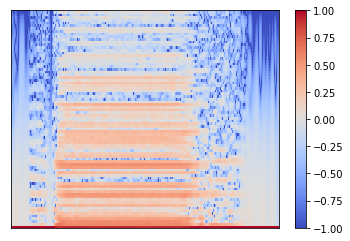

In [25]:
librosa.display.specshow(X_all[0])
plt.colorbar()

In [26]:
for i,spect in enumerate(X_all):
    
    this_min = np.min(spect)
    this_max = np.max(spect)
    if this_min < -1 or this_max > 1 or np.isnan(this_min):
        print('Wierdness at {}'.format(i))

### Pickle It

In [27]:
with open(outfile,'wb') as fp:
    pickle.dump(X_all,fp)

### MFCC-80 HL512

In [8]:
outfile = './preprocessed_test/MFCC-80-HL512-WF32k-64k'

sr = 32000
file_length = 64000

n_fft = 1024
hop_length = 512

mels = 80
rep = 'mfcc'

frames = int(np.ceil(file_length/hop_length))

In [9]:
X_all = load_and_preprocess(filenames_test,path_test,
                            sr,file_length,
                            n_fft,hop_length,mels,rep)

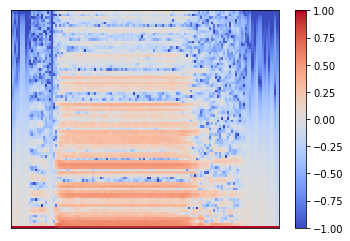

In [10]:
librosa.display.specshow(X_all[0])
plt.colorbar()

In [11]:
for i,spect in enumerate(X_all):
    
    this_min = np.min(spect)
    this_max = np.max(spect)
    if this_min < -1 or this_max > 1 or np.isnan(this_min):
        print('Wierdness at {}'.format(i))

### Pickle It

In [12]:
with open(outfile,'wb') as fp:
    pickle.dump(X_all,fp)

### MFCC-120 HL256

In [8]:
outfile = './preprocessed_test/MFCC-120-HL256-WF32k-64k'

sr = 32000
file_length = 64000

n_fft = 1024
hop_length = 256

mels = 120
rep = 'mfcc'

frames = int(np.ceil(file_length/hop_length))

In [9]:
X_all = load_and_preprocess(filenames_test,path_test,
                            sr,file_length,
                            n_fft,hop_length,mels,rep)

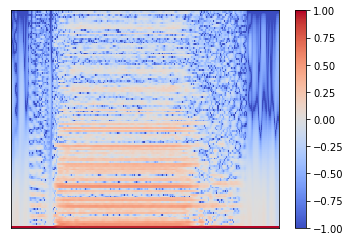

In [10]:
librosa.display.specshow(X_all[0])
plt.colorbar()

In [11]:
for i,spect in enumerate(X_all):
    
    this_min = np.min(spect)
    this_max = np.max(spect)
    if this_min < -1 or this_max > 1 or np.isnan(this_min):
        print('Wierdness at {}'.format(i))

### Pickle It

In [12]:
with open(outfile,'wb') as fp:
    pickle.dump(X_all,fp)

### MFCC-120 HL512

In [8]:
outfile = './preprocessed_test/MFCC-120-HL512-WF32k-64k'

sr = 32000
file_length = 64000

n_fft = 1024
hop_length = 512

mels = 120
rep = 'mfcc'

frames = int(np.ceil(file_length/hop_length))

In [9]:
X_all = load_and_preprocess(filenames_test,path_test,
                            sr,file_length,
                            n_fft,hop_length,mels,rep)

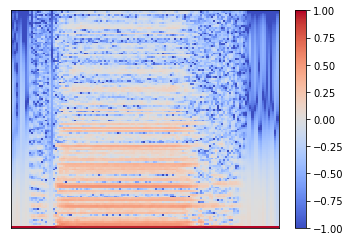

In [10]:
librosa.display.specshow(X_all[0])
plt.colorbar()

In [11]:
for i,spect in enumerate(X_all):
    
    this_min = np.min(spect)
    this_max = np.max(spect)
    if this_min < -1 or this_max > 1 or np.isnan(this_min):
        print('Wierdness at {}'.format(i))

### Pickle It

In [12]:
with open(outfile,'wb') as fp:
    pickle.dump(X_all,fp)

### MS-80 HL256

In [8]:
outfile = './preprocessed_test/MS-80-HL256-WF32k-64k'

sr = 32000
file_length = 64000

n_fft = 1024
hop_length = 256

mels = 80
rep = 'mel'

frames = int(np.ceil(file_length/hop_length))

In [9]:
X_all = load_and_preprocess(filenames_test,path_test,
                            sr,file_length,
                            n_fft,hop_length,mels,rep)

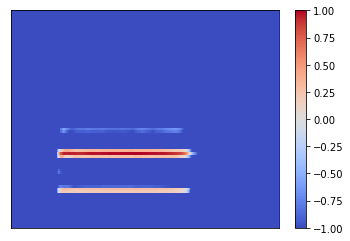

In [10]:
librosa.display.specshow(X_all[0])
plt.colorbar()

In [11]:
weird = []

for i,spect in enumerate(X_all):
    
    this_min = np.min(spect)
    this_max = np.max(spect)
    if this_min < -1 or this_max > 1 or np.isnan(this_min):
        weird.append(i)
        print('Wierdness at {}'.format(i))
for i in weird:
    X_all[i] = np.zeros(X_all[i].shape)

### Pickle It

In [12]:
with open(outfile,'wb') as fp:
    pickle.dump(X_all,fp)

### MS-80 HL512

In [8]:
outfile = './preprocessed_test/MS-80-HL512-WF32k-64k'

sr = 32000
file_length = 64000

n_fft = 1024
hop_length = 512

mels = 80
rep = 'mel'

frames = int(np.ceil(file_length/hop_length))

In [9]:
X_all = load_and_preprocess(filenames_test,path_test,
                            sr,file_length,
                            n_fft,hop_length,mels,rep)

### Check and Replace Weird Things

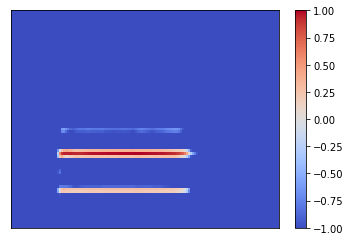

In [10]:
librosa.display.specshow(X_all[0])
plt.colorbar()

In [11]:
weird = []

for i,spect in enumerate(X_all):
    
    this_min = np.min(spect)
    this_max = np.max(spect)
    if this_min < -1 or this_max > 1 or np.isnan(this_min):
        weird.append(i)
        print('Wierdness at {}'.format(i))
for i in weird:
    X_all[i] = np.zeros(X_all[i].shape)

### Pickle It

In [12]:
with open(outfile,'wb') as fp:
    pickle.dump(X_all,fp)

### MS-120 HL256

In [13]:
outfile = './preprocessed_test/MS-120-HL256-WF32k-64k'

sr = 32000
file_length = 64000

n_fft = 1024
hop_length = 256

mels = 120
rep = 'mel'

frames = int(np.ceil(file_length/hop_length))

In [14]:
X_all = load_and_preprocess(filenames_test,path_test,
                            sr,file_length,
                            n_fft,hop_length,mels,rep)

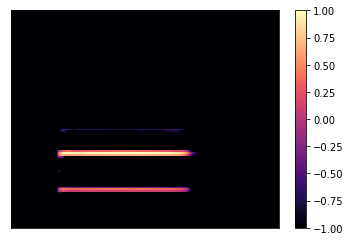

In [15]:
librosa.display.specshow(X_all[0])
plt.colorbar()

In [16]:
weird = []

for i,spect in enumerate(X_all):
    
    this_min = np.min(spect)
    this_max = np.max(spect)
    if this_min < -1 or this_max > 1 or np.isnan(this_min):
        weird.append(i)
        print('Wierdness at {}'.format(i))
for i in weird:
    X_all[i] = np.zeros(X_all[i].shape)

### Pickle It

In [17]:
with open(outfile,'wb') as fp:
    pickle.dump(X_all,fp)

### MS-120 HL512

In [18]:
outfile = './preprocessed_test/MS-120-HL512-WF32k-64k'

sr = 32000
file_length = 64000

n_fft = 1024
hop_length = 512

mels = 120
rep = 'mel'

frames = int(np.ceil(file_length/hop_length))

In [19]:
X_all = load_and_preprocess(filenames_test,path_test,
                            sr,file_length,
                            n_fft,hop_length,mels,rep)

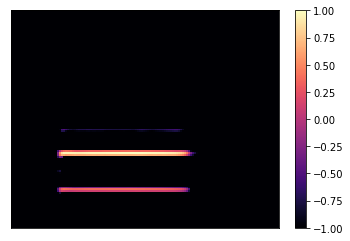

In [20]:
librosa.display.specshow(X_all[0])
plt.colorbar()

In [21]:
weird = []

for i,spect in enumerate(X_all):
    
    this_min = np.min(spect)
    this_max = np.max(spect)
    if this_min < -1 or this_max > 1 or np.isnan(this_min):
        weird.append(i)
        print('Wierdness at {}'.format(i))
for i in weird:
    X_all[i] = np.zeros(X_all[i].shape)

### Pickle It

In [22]:
with open(outfile,'wb') as fp:
    pickle.dump(X_all,fp)